In [1]:
import wikipediaapi

In [5]:
import os
print(os.getcwd())  # Mevcut çalışma dizinini gösterir
import wikipediaapi
import nltk
from nltk.tokenize import word_tokenize

# Wikipedia API nesnesini oluşturuyoruz
wiki_wiki = wikipediaapi.Wikipedia(user_agent="MyApp/1.0 (myemail@example.com)", language="tr")

# Dosya yolunu tanımla
dosya_yolu = "proje/sanatcilar_biyografi.txt"

# Dosyanın mevcut olup olmadığını kontrol et
sanatci_listesi = set()

if os.path.exists(dosya_yolu):
    with open(dosya_yolu, "r", encoding="utf-8") as file:
        sanatci_listesi = {satir.strip() for satir in file}
else:
    print(f"Hata: '{dosya_yolu}' adlı dosya bulunamadı!")

# Sanatçı biyografilerini Wikipedia'dan çekiyoruz
sanatci_metinleri = []
for sanatci in sanatci_listesi:
    sayfa = wiki_wiki.page(sanatci)
    if sayfa.exists():
        sanatci_metinleri.append(sayfa.text)
    else:
        print(f"Uyarı: '{sanatci}' için Wikipedia sayfası bulunamadı!")

# Metinleri birleştir
combined_text = " ".join(sanatci_metinleri)

# Kelime tokenizasyonu
word_tokens = word_tokenize(combined_text)
word_count = len(word_tokens)

print("Toplam kelime sayısı:", word_count)


C:\Windows\System32\-Sanatçı proje
Hata: 'proje/sanatcilar_biyografi.txt' adlı dosya bulunamadı!
Toplam kelime sayısı: 0


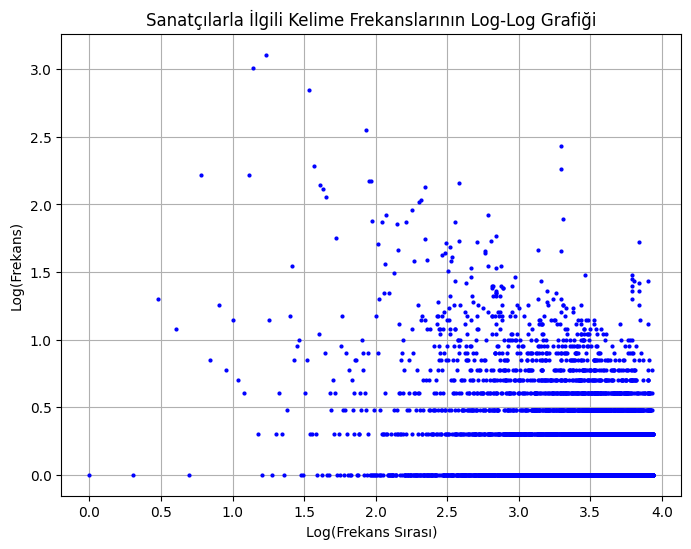

In [5]:
import wikipediaapi
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# Wikipedia API nesnesini oluşturuyoruz
wiki_wiki = wikipediaapi.Wikipedia(user_agent="MyApp/1.0 (myemail@example.com)", language="tr")

# Sanatçıların sayfalarını çekiyoruz
sanatci_listesi = {
    "Frida Kahlo": wiki_wiki.page("Frida_Kahlo").text,
    "Leonardo da Vinci": wiki_wiki.page("Leonardo_da_Vinci").text,
    "Vincent van Gogh": wiki_wiki.page("Vincent_van_Gogh").text,
    "Pablo Picasso": wiki_wiki.page("Pablo_Picasso").text,
    "Andy Warhol": wiki_wiki.page("Andy_Warhol").text,
    "Bedri Rahmi Eyüboğlu": wiki_wiki.page("Bedri_Rahmi_Eyüboğlu").text,
    "Salvador Dalí": wiki_wiki.page("Salvador_Dalí").text,
    "Osman Hamdi Bey": wiki_wiki.page("Osman_Hamdi_Bey").text,
    "Yayoi Kusama": wiki_wiki.page("Yayoi_Kusama").text,
    "Barbara Kruger": wiki_wiki.page("Barbara_Kruger").text
}

# Tüm sanatçıların metinlerini birleştiriyoruz
combined_text = " ".join(sanatci_listesi.values())

# Kelime tokenizasyonu
word_tokens = word_tokenize(combined_text)

# Kelimelerin frekansını hesaplayalım
word_freq = Counter(word_tokens)

# Frekansları sıralayalım
freqs = list(word_freq.values())

# Frekansların logaritmalarını alalım
log_freqs = np.log10(freqs)

# Kelime sırası için logaritma alalım
log_words = np.log10(range(1, len(freqs) + 1))

# Log-log grafiğini çizelim
plt.figure(figsize=(8, 6))
plt.plot(log_words, log_freqs, 'bo', markersize=2)
plt.xlabel('Log(Frekans Sırası)')
plt.ylabel('Log(Frekans)')
plt.title('Sanatçılarla İlgili Kelime Frekanslarının Log-Log Grafiği')
plt.grid(True)
plt.show()
